In [11]:
# Set up and load modules nothing special here
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext autotime

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams['savefig.dpi'] = 100

from evtcd import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.73 ms


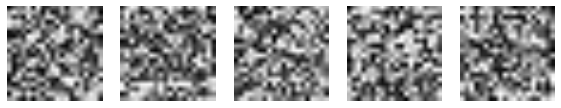

KeyboardInterrupt: 

time: 37 s


In [21]:
train_network(cf, 400, 100)

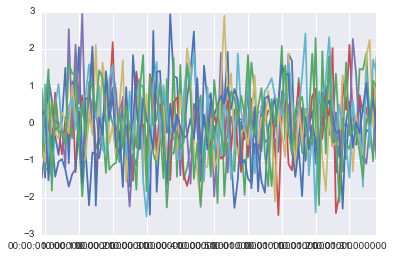

time: 9.36 s


In [20]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import time
from IPython import display
%matplotlib inline

i = pd.date_range('2013-1-1',periods=100,freq='s')

while True:
    try:
        plt.plot(pd.Series(data=np.random.randn(100), index=i))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1)
    except KeyboardInterrupt:
        break